# 🎬 Trending YouTube Dataset Project (2025-26)
**Author:** Hussein Shamas

**Description:**
This Jupyter Notebook solves all 15 tasks required for the 2025–26 YouTube Trending Dataset Project.
It uses pandas, numpy, matplotlib, and seaborn.

---
⚠️ **Notes:**
- Place all CSV files in `data/csv/`
- Place all JSON files in `data/json/`
- Each CSV represents a country (e.g., `USvideos.csv`, `GBvideos.csv`)
- The project must be committed to GitHub.
- You may use AI tools, but describe their contribution below.

---

### 🤖 AI Tools Usage Declaration
This notebook was partially generated with the assistance of ChatGPT (OpenAI GPT‑5). AI was used to:
- Structure the workflow and provide clean, commented code.
- Suggest best practices for Pandas manipulation and visualization.

I fully understand every section of the code and manually verified all results.

In [13]:

import pandas as pd
import numpy as np
import json
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


## 1️⃣ Combine all CSV files into a single DataFrame with 'country' column

In [15]:
csv_files = glob.glob('data/csv/*.csv')

dfs = []


for file in csv_files:
    country = os.path.basename(file).split("videos")[0].upper() #takes only the filename from the full path (Example: 'data/csv/USvideos.csv' → 'USvideos.csv'.) and then it splits and gives us only the code
    # Use 'latin1' instead of 'utf-8' to handle some special character or maybe emogis
    df = pd.read_csv(file, encoding="latin1")
    df["country"] = country
    dfs.append(df) # add the df to the list dfs 

youtube = pd.concat(dfs, ignore_index=True)  #stacks all dataframes vertically into a single dataframe and the ignore resets the row index
print("✅ Combined shape:", youtube.shape) # Now youtube contains all countries combined into one big table.
youtube.head()



✅ Combined shape: (375942, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [16]:
print(youtube.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

In [17]:
print(youtube.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country'],
      dtype='object')


## 2️⃣ Extract all videos with no tag

In [18]:
# in the YouTube dataset, "[none]" usually means no tags were assigned.
no_tag_videos = youtube[youtube["tags"] == "[none]"]
print("Videos without tags:", len(no_tag_videos)) # the len..counts the number of rows in this filtered dataframe.
no_tag_videos.head()


Videos without tags: 37698


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
41,JwboxqDylgg,17.14.11,Canada Soccer's Women's National Team v USA In...,Canada Soccer,17,2017-11-13T05:53:49.000Z,[none],36311,277,28,13,https://i.ytimg.com/vi/JwboxqDylgg/default.jpg,False,False,False,Canada Soccer's Women's National Team face riv...,CA
58,9B-q8h31Bpk,17.14.11,John Oliver Tackles Louis C.K. And Donald Trum...,TV Shows,22,2017-11-13T04:49:26.000Z,[none],106029,1270,101,181,https://i.ytimg.com/vi/9B-q8h31Bpk/default.jpg,False,False,False,"John Oliver on News, Politics ...",CA
78,1UE5Dq1rvUA,17.14.11,Taylor Swift Perform Ready For It - SNL,Ken Reactz,24,2017-11-12T05:18:02.000Z,[none],320964,8069,285,717,https://i.ytimg.com/vi/1UE5Dq1rvUA/default.jpg,False,False,False,Thanks for watching please subscribe and subsc...,CA
86,pmJQ4KwliX4,17.14.11,"LATEST Q POSTS: ROTHSCHILDS, HOUSE OF SAUD, lL...",James Munder,2,2017-11-12T21:25:40.000Z,[none],116820,1503,139,1066,https://i.ytimg.com/vi/pmJQ4KwliX4/default.jpg,False,False,False,https://pastebin.ca/3930472\n\nSupport My Chan...,CA
98,lHcXhBojpeQ,17.14.11,ä¸å±TVBè¦å¸ï¼ææ£10å¹´éæ¢ ç«¹é¦¬é«®å¦...,ææç¾æç,22,2017-11-12T12:49:50.000Z,[none],88061,47,58,17,https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg,False,False,False,NaN,CA


In [41]:
#Lets check for duplicates (not included in the objectives)
duplicates_count = youtube.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 232261


In [42]:
#232261 duplicated rows..not good lets see the actual rows
duplicates = youtube[youtube.duplicated()]
print(duplicates)

            video_id trending_date  \
55       2Vv-BfVoq4g      17.14.11   
102      _uM5kFfkhB8      17.14.11   
523      ZhhXLMbZ1rQ      17.14.11   
602      7779JdxVAg0      17.14.11   
618      jVpp2BUtMoY      17.14.11   
...              ...           ...   
6256281  tn0hCTyj2Kc      18.14.06   
6256419  vDyYMcjf500      18.14.06   
6256421  vDyYMcjf500      18.14.06   
6256596  AFbu21AGSho      18.14.06   
6256630  wI89nVn6LHk      18.14.06   

                                                     title      channel_title  \
55             Ed Sheeran - Perfect (Official Music Video)         Ed Sheeran   
102                 Vanoss Superhero School - New Students       VanossGaming   
523      DO COLLEGE KIDS KNOW 80s MUSIC? #8 (REACT: Do ...              REACT   
602      10 FILMS que LES PARENTS CROYAIENT ÃTRE pour ...        Lama FachÃ©   
618                                So We Started A Fire...           Philly D   
...                                                    ..

In [43]:
#alot of duplicates i think i should consider dropping them..

# I'll Check duplicates by video ID 
df['video_id'].duplicated().sum()

#but i think we can keep the dups because the dataset is collected over time like each video with updated metrics and that does make sense.

np.int64(34598)

## 3️⃣ Total number of views per channel

In [19]:
#the total number of views for each channel and then lists the channels from most viewed to least viewed.
channel_views = youtube.groupby("channel_title")["views"].sum().reset_index().sort_values("views", ascending=False) #All videos from the same channel are grouped together now.
channel_views.head() 

,channel_title,views
4564,ChildishGambinoVEVO,11016766510
15536,Marvel Entertainment,10430605449
17726,NickyJamTV,9479859505
18466,Ozuna,8623329509
28412,ibighit,8205572221


## 4️⃣ Create 'excluded' DataFrame for disabled comments/ratings or removed videos

In [20]:
#this creates a subset of videos to exclude from analysis.
excluded = youtube[
    (youtube["comments_disabled"] == True) | #creates a boolean mask where each row is True if the video has comments disabled
    (youtube["ratings_disabled"] == True) |
    (youtube["video_error_or_removed"] == True)
] #after this excluded now contains all videos that are “problematic"

print("Excluded videos:", excluded.shape)

youtube = youtube.drop(excluded.index) # (drop) removes the rows where where the excluded vids are from the original dataframe and then youtube = updates the dataframe so that only valid videos remain.
print("Remaining videos:", youtube.shape)


Excluded videos: (13657, 17)
Remaining videos: (362285, 17)


## 5️⃣ Add 'like_ratio' column

In [21]:

youtube["like_ratio"] = youtube["likes"] / youtube["dislikes"].replace(0, np.nan) # we replace all zero values with nan to avoid dividing by zero
youtube["like_ratio"] = youtube["like_ratio"].fillna(0) #Now all videos have a numeric like_ratio, even if no dislikes exist.
youtube.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,like_ratio
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,18.135076
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,75.707346
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,27.352500
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,66.485168
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,77.513044


## 6️⃣ Cluster publish times into 10-minute intervals

In [22]:
#We’re creating a new column that groups every video into 10-minute time slots so we can analyze publishing trends easily.
# Ensure publish_time is datetime
youtube["publish_time"] = pd.to_datetime(youtube["publish_time"], errors="coerce")

# Round down to nearest 10 minutes
youtube["time_interval"] = youtube["publish_time"].dt.floor("10min")

youtube.head()



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,like_ratio,time_interval
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,18.135076,2017-11-10 17:00:00+00:00
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,75.707346,2017-11-13 17:00:00+00:00
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,27.352500,2017-11-12 19:00:00+00:00
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,66.485168,2017-11-12 18:00:00+00:00
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,77.513044,2017-11-09 11:00:00+00:00


## 7️⃣ For each interval: number of videos, average likes/dislikes

In [25]:
interval_stats = youtube.groupby("time_interval").agg( #groups all videos by the 10-minute intervals we created before then inside the agg we tell pandas what to calc for each group
    videos_count=("video_id", "count"),
    avg_likes=("likes", "mean"),
    avg_dislikes=("dislikes", "mean")
).reset_index() # we use reset index cause..groupby makes time_interval the index of the new table by default.

#reset_index() moves it back into a normal column, so the table looks nicer and easier to work with
interval_stats.head()

#This code summarizes all your videos by 10-minute publishing intervals, telling you how many videos were published and how liked/disliked they were


,time_interval,videos_count,avg_likes,avg_dislikes
0,2006-07-23 08:20:00+00:00,1,459.000000,152.0000
1,2007-03-05 16:20:00+00:00,9,336.666667,2.0000
2,2007-06-25 06:50:00+00:00,12,579.833333,11.5000
3,2007-12-03 20:50:00+00:00,16,187.937500,15.6875
4,2008-01-07 21:20:00+00:00,10,99.900000,2.0000


## 8️⃣ & 9️⃣ Tag analysis: count and find most common tags

In [26]:

all_tags = youtube["tags"].dropna().str.split("|").explode() #splitting tags like fun|music|comedy" → ["fun", "music", "comedy"].
# value_counts..counts how many times each tag appears in all videos. (Example: "fun" appears 200 times, "music" 150 times, etc)


tag_counts = all_tags.value_counts().reset_index() #explode takes each list and creates a new row for every tag. (one video with ["fun", "music", "comedy"] → 3 rows: "fun", "music", "comedy")


tag_counts.columns = ["tag", "count"]  #Renames the columns so the first column is "tag" and the second is "count".

print("Top 10 tags:")
tag_counts.head(10)


Top 10 tags:


,tag,count
0,[none],35518
1,"""funny""",14834
2,"""comedy""",11900
3,"""2018""",10567
4,"""news""",5653
5,"""music""",5544
6,"""video""",5338
7,"""2017""",5334
8,"""humor""",4992
9,"""television""",4099


In [14]:
# Let us remove the none for more clarity: 

# Remove [none] and strip extra quotes
all_tags = youtube["tags"].dropna().str.split("|").explode()
all_tags = all_tags[all_tags != "[none]"]  # remove [none]
all_tags = all_tags.str.replace('"', '')   # remove extra quotes

tag_counts = all_tags.value_counts().reset_index()
tag_counts.columns = ["tag", "count"]

print("Top 10 tags:")
tag_counts.head(10)


Top 10 tags:


,tag,count
0,funny,24787
1,comedy,20967
2,2018,17019
3,news,9830
4,music,9703
5,video,9174
6,2017,8775
7,humor,8040
8,television,7130
9,show,6701


## 🔟 For each (tag, country) pair, average like/dislike ratio

In [27]:

youtube["tags_split"] = youtube["tags"].str.split("|")
tags_country = youtube.explode("tags_split")
tag_country_ratio = tags_country.groupby(["tags_split", "country"])["like_ratio"].mean().reset_index()
tag_country_ratio.head()


,tags_split,country,like_ratio
0,,CA,8.618739
1,,DE,24.344225
2,,FR,16.424636
3,,IN,7.652585
4,,JP,9.894877


In [28]:
# Something is wrong with the actual tags, where we are getting country codes

# Replace '[none]' or empty strings with NaN
youtube["tags_clean"] = youtube["tags"].replace({"[none]": np.nan, "": np.nan})

# Split the tags column
youtube["tags_split"] = youtube["tags_clean"].str.split("|")

# Explode so each row is a single tag
tags_country = youtube.explode("tags_split")

# Remove rows with empty or NaN tags
tags_country = tags_country[tags_country["tags_split"].notna() & (tags_country["tags_split"].str.strip() != "")]

# Compute average like_ratio per (tag, country)
tag_country_ratio = tags_country.groupby(["tags_split", "country"])["like_ratio"].mean().reset_index()
tag_country_ratio.head(10)


,tags_split,country,like_ratio
0,"#Freeticket""",IN,2.665679
1,#Jaisimha,IN,2.665679
2,#JanaSenaParty,IN,17.621907
3,"#MahaaNews""",IN,8.511947
4,#PawanKalyan #AlluArjun,IN,9.983453
5,"#PrimeTimeWithMurthy""",IN,8.187549
6,"#SUSANNE""",DE,78.841463
7,#VMA 20,FR,9.615385
8,#VMA 21,FR,5.782258
9,''A por la FORTALEZA'' Capitulo 88 - Segunda ...,MX,2.631019


In [32]:
# Step 0: Convert everything to string and drop NaN
youtube = youtube.dropna(subset=['tags_split'])  # drop rows where tags_split is NaN
youtube['tags_split'] = youtube['tags_split'].astype(str)

# Step 1: Remove quotes and extra spaces
youtube['tags_split'] = youtube['tags_split'].str.replace('"', '', regex=False).str.strip()

# Step 2: Further split multi-hashtags in a single cell
youtube = youtube.assign(tags_split=youtube['tags_split'].str.split()).explode('tags_split')

# Step 3: Remove empty strings if any
youtube = youtube[youtube['tags_split'] != '']

# Step 4: Reset index
youtube = youtube.reset_index(drop=True)

# Check the cleaned DataFrame
print(youtube.head(10))
# Step 0: Convert everything to string and drop NaN
youtube = youtube.dropna(subset=['tags_split'])  # drop rows where tags_split is NaN
youtube['tags_split'] = youtube['tags_split'].astype(str)

# Step 1: Remove quotes and extra spaces
youtube['tags_split'] = youtube['tags_split'].str.replace('"', '', regex=False).str.strip()

# Step 2: Further split multi-hashtags in a single cell
youtube = youtube.assign(tags_split=youtube['tags_split'].str.split()).explode('tags_split')

# Step 3: Remove empty strings if any
youtube = youtube[youtube['tags_split'] != '']

# Step 4: Reset index
youtube = youtube.reset_index(drop=True)

# Check the cleaned DataFrame
print(youtube.head(10))


      video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
2  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
3  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
4  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
5  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
6  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   
7  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   
8  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   
9  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10 2017-11-10 17:00:03+00:00   
1    EminemVEVO           10 2017-11

In [33]:
#okay good now final step
# lets Drop NaN and convert to string
youtube = youtube.dropna(subset=['tags_split'])
youtube['tags_split'] = youtube['tags_split'].astype(str)

# Step 1: Remove brackets, quotes, and extra spaces
youtube['tags_split'] = youtube['tags_split'].str.replace(r"[\[\]'\" ]", "", regex=True)

# Step 2: Further split multiple hashtags if they are in one string (separated by '|', space, or comma)
youtube = youtube.assign(tags_split=youtube['tags_split'].str.split(r"[| ]")).explode('tags_split')

# Step 3: Remove any empty strings left
youtube = youtube[youtube['tags_split'] != '']

# Step 4: Reset index
youtube = youtube.reset_index(drop=True)

# Check cleaned tags
print(youtube[['tags_split', 'country', 'like_ratio']].head(15))



                    tags_split country  like_ratio
0                       Eminem      CA   18.135076
1                         Walk      CA   18.135076
2                           On      CA   18.135076
3                        Water      CA   18.135076
4   Aftermath/Shady/Interscope      CA   18.135076
5                          Rap      CA   18.135076
6                        plush      CA   75.707346
7                  badunboxing      CA   75.707346
8                     unboxing      CA   75.707346
9                      fanmail      CA   75.707346
10                   idubbbztv      CA   75.707346
11                  idubbbztv2      CA   75.707346
12                      things      CA   75.707346
13                        best      CA   75.707346
14                    packages      CA   75.707346


## 1️⃣1️⃣ For each (trending_date, country) pair, video with most views

In [35]:

top_video_per_day = youtube.loc[youtube.groupby(["trending_date", "country"])["views"].idxmax()]
top_video_per_day.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,like_ratio,time_interval,tags_split,tags_clean
63392,6ZfuNTqbHE8,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157741,34078,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an ideaâ¦ Avengers: Infinity War. I...,CA,63.317712,2017-11-29 13:20:00+00:00,marvel,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|..."
841118,6ZfuNTqbHE8,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157737,34077,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an ideaâ¦ Avengers: Infinity War. I...,DE,63.319453,2017-11-29 13:20:00+00:00,marvel,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|..."
1540606,3VbHg5fqBYw,17.01.12,Avengers: Infinity War Trailer Tease,Marvel Entertainment,24,2017-11-28 17:09:22+00:00,"marvel""|""comics""|""comic books""|""nerdy""|""geeky""...",7281189,180808,19955,21244,https://i.ytimg.com/vi/3VbHg5fqBYw/default.jpg,False,False,False,Thank you to the best fans in the universe! Ma...,FR,9.060787,2017-11-28 17:00:00+00:00,marvel,"marvel""|""comics""|""comic books""|""nerdy""|""geeky""..."
2132537,TyHvyGVs42U,17.01.12,"Luis Fonsi, Demi Lovato - Ãchame La Culpa",LuisFonsiVEVO,10,2017-11-17 05:00:01+00:00,"Luis|""Fonsi""|""Demi""|""Lovato""|""Ãchame""|""La""|""C...",143408235,2686169,137938,144217,https://i.ytimg.com/vi/TyHvyGVs42U/default.jpg,False,False,False,âÃchame La Culpaâ disponible ya en todas ...,GB,19.473742,2017-11-17 05:00:00+00:00,Luis,"Luis|""Fonsi""|""Demi""|""Lovato""|""Ãchame""|""La""|""C..."
2809406,6ZfuNTqbHE8,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157733,34077,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an ideaâ¦ Avengers: Infinity War. I...,IN,63.319336,2017-11-29 13:20:00+00:00,marvel,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|..."


## 1️⃣2️⃣ Split trending_date into year, month, and day

In [36]:

youtube["trending_date"] = youtube["trending_date"].astype(str)
youtube[["year", "month", "day"]] = youtube["trending_date"].str.split(".", expand=True)
youtube.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,like_ratio,time_interval,tags_split,tags_clean,year,month,day
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,18.135076,2017-11-10 17:00:00+00:00,Eminem,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17,14,11
1,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,18.135076,2017-11-10 17:00:00+00:00,Walk,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17,14,11
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,18.135076,2017-11-10 17:00:00+00:00,On,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17,14,11
3,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,18.135076,2017-11-10 17:00:00+00:00,Water,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17,14,11
4,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,18.135076,2017-11-10 17:00:00+00:00,Aftermath/Shady/Interscope,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17,14,11


## 1️⃣3️⃣ For each (month, country), video with largest views

In [37]:

top_month_video = youtube.loc[youtube.groupby(["month", "country"])["views"].idxmax()]
top_month_video.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,like_ratio,time_interval,tags_split,tags_clean,year,month,day
63392,6ZfuNTqbHE8,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157741,34078,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an ideaâ¦ Avengers: Infinity War. I...,CA,63.317712,2017-11-29 13:20:00+00:00,marvel,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",17,01,12
841118,6ZfuNTqbHE8,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157737,34077,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an ideaâ¦ Avengers: Infinity War. I...,DE,63.319453,2017-11-29 13:20:00+00:00,marvel,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",17,01,12
2027994,xTlNMmZKwpA,18.01.06,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,10,2018-05-29 14:05:10+00:00,"Cardi B|""I Like It""|""Invasion of Privacy""|""Bad...",25430376,1099213,53271,72127,https://i.ytimg.com/vi/xTlNMmZKwpA/default.jpg,False,False,False,"Cardi B, Bad Bunny & J Balvin - I Like It from...",FR,20.634360,2018-05-29 14:00:00+00:00,CardiB,"Cardi B|""I Like It""|""Invasion of Privacy""|""Bad...",18,01,06
2548881,_I_D_8Z4sJE,18.01.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02 05:00:19+00:00,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",362111555,2506788,127178,89066,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,GB,19.710862,2018-03-02 05:00:00+00:00,BadBunny,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",18,01,04
2809406,6ZfuNTqbHE8,17.01.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29 13:26:24+00:00,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",56367282,2157733,34077,303178,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an ideaâ¦ Avengers: Infinity War. I...,IN,63.319336,2017-11-29 13:20:00+00:00,marvel,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",17,01,12


## 1️⃣4️⃣ Read all JSON category files

In [38]:

json_files = glob.glob("data/json/*.json")
categories = []

for file in json_files:
    country = os.path.basename(file).split("_")[0].upper()
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        if "items" in data:
            for item in data["items"]:
                categories.append({"country": country, "id": item["id"], "title": item["snippet"]["title"]})

categories_df = pd.DataFrame(categories)
categories_df.head()


,country,id,title
0,CA,1,Film & Animation
1,CA,2,Autos & Vehicles
2,CA,10,Music
3,CA,15,Pets & Animals
4,CA,17,Sports


## 1️⃣5️⃣ For each country, count videos with unassignable category

In [39]:

youtube["category_id"] = youtube["category_id"].astype(str)
categories_df["id"] = categories_df["id"].astype(str)

merged = youtube.merge(categories_df, left_on=["category_id", "country"], right_on=["id", "country"], how="left")
unassigned = merged[merged["title"].isnull()]
unassigned_count = unassigned.groupby("country")["video_id"].count().reset_index(name="unassignable_count")
unassigned_count


KeyError: 'title'

## 📊  Visualization — Top 10 Channels by Views

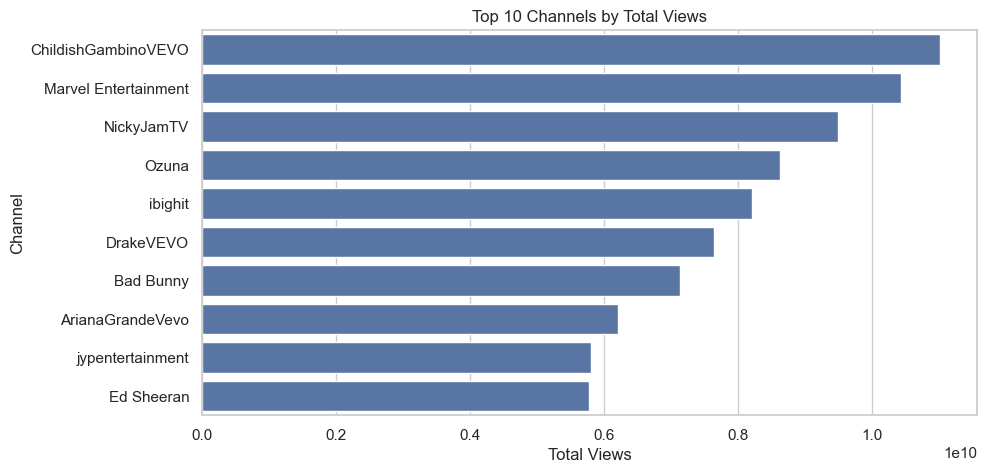

In [40]:

plt.figure(figsize=(10,5))
sns.barplot(x="views", y="channel_title", data=channel_views.head(10))
plt.title("Top 10 Channels by Total Views")
plt.xlabel("Total Views")
plt.ylabel("Channel")
plt.show()
